In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
ds = pd.read_csv('Ads_CTR_Optimisation.csv')
ds.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
ds.shape
# 10000 ->rows
# 10 columns

(10000, 10)

In [25]:
# total number of the add
d = ds.shape[1]
# no. of the time the ad i get the reward 1
# [0]*d means create a array of the d length with the 0 as default value
number_of_reward_1 = [0]*d
# no. of the time the ad_i get the penalty 0
number_of_reward_0 = [0]*d
# Total no of the rounds
N = ds.shape[0]
# the ad algorithm will select 
ads_selected = []
# total reward
total_reward = 0
# no. of the time ad_i is selected
numbers_of_selection = [0]*d
# for all the rounds N
for i in range(0, N):
    max_random = 0
    ad = 0
    # for the all 10 ad
    for j in range(0, d):
        # passing the rewards count to betavariate function to calucuate the beta, +1 is for handling the [0,0] in the initial condition as the function not except the 0 value and +1 to both the parameter will not make any considerable changes 
        random_beta = random.betavariate(number_of_reward_1[j] +1,
                                        number_of_reward_0[j]+1)
        # filtering out the ad that have the greates beta value till now and selecting the ad 
        if random_beta > max_random:
            max_random = random_beta
            ad = j
    # appending the selected ad
    ads_selected.append(ad)
    # get the reward the selected ad get from user
    reward = ds.values[i,ad]
    total_reward += reward
    # if reward is 1 update 1 count else update 0 count with 1
    if reward == 1:
        number_of_reward_1[ad] = number_of_reward_1[ad]+1
    else:
        number_of_reward_0[ad] = number_of_reward_0[ad]+1
    # increment the selection count for the ad, as it is selected
    numbers_of_selection[ad] = numbers_of_selection[ad]+1


In [26]:
total_reward

2606

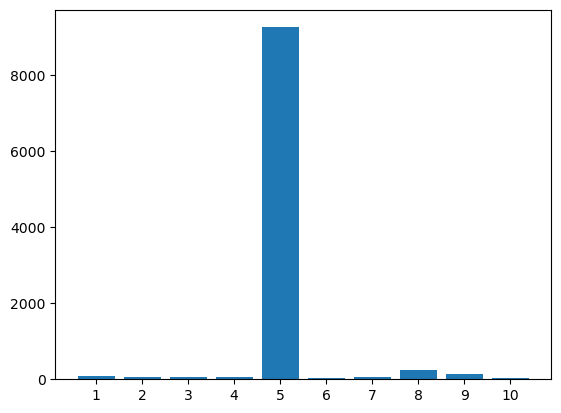

In [27]:
plt.bar(range(1,11), numbers_of_selection, align="center")
plt.xticks(range(1, 11))
plt.show()